## Preprocessing

In [3]:
## filter subreddits and save locally
# from convokit import Corpus, download
# subreddit = "Christian"
# corpus = Corpus(filename=download(f'subreddit-{subreddit}'), storage_type='mem')
# small = Corpus.filter_utterances(corpus, lambda x: x.timestamp >= 1504238400)
# small.print_summary_stats()
# small.dump(f"subreddit-{subreddit}-small", base_path = "./")

# load to mongo if needed
# Corpus(f"subreddit-{subreddit}-small", storage_type='db')

Dataset already exists at /Users/wyw/.convokit/downloads/subreddit-Christian
Number of Speakers: 3976
Number of Utterances: 33722
Number of Conversations: 3031


## Load the Corpus

In [ ]:
# locally is faster
christian = Corpus("subreddit-Christian-small", storage_type='mem')
buddhism = Corpus("subreddit-Buddhism-small", storage_type='mem')
jud = Corpus("subreddit-judaism-small", storage_type='mem')

## Simple Statistics

In [53]:
# utterance level length
print("Christian: ", stats.describe([len(utt.text.split()) for utt in christian.iter_utterances()]))
print("Buddhism: ", stats.describe([len(utt.text.split()) for utt in buddhism.iter_utterances()]))
print("Judaism: ", stats.describe([len(utt.text.split()) for utt in jud.iter_utterances()]))

In [33]:
def get_post_utterance(corpus):
    posts = list()
    for utt in corpus.iter_utterances():
        if not utt.reply_to:
            posts.append(utt)
    return posts

In [40]:
chr_posts = get_post_utterance(christian)
bud_posts = get_post_utterance(buddhism)
jud_posts = get_post_utterance(jud)

In [41]:
from scipy import stats
print("Christian: ", stats.describe([len(p.text.split()) for p in chr_posts]))
print("Buddhism: ", stats.describe([len(p.text.split()) for p in bud_posts]))
print("Judaism: ", stats.describe([len(p.text.split()) for p in jud_posts]))

Christian:  DescribeResult(nobs=2997, minmax=(0, 6891), mean=107.59526192859526, variance=57569.243675807535, skewness=11.11894417213671, kurtosis=241.8798354979815)
Buddhism:  DescribeResult(nobs=14173, minmax=(0, 6824), mean=88.32667748535948, variance=44455.01492261098, skewness=10.68594258367538, kurtosis=213.173870857632)
Judaism:  DescribeResult(nobs=12232, minmax=(0, 4410), mean=35.09393394375409, variance=12818.600201937585, skewness=11.522746525375608, kurtosis=278.72311381673035)


In [45]:
def get_comment_utterance(corpus):
    comments = list()
    for utt in corpus.iter_utterances():
        if utt.reply_to:
            comments.append(utt)
    return comments

In [46]:
chr_com = get_comment_utterance(christian)
bud_com = get_comment_utterance(buddhism)
jud_com = get_comment_utterance(jud)

In [47]:
from scipy import stats
print("Christian: ", stats.describe([len(p.text.split()) for p in chr_com]))
print("Buddhism: ", stats.describe([len(p.text.split()) for p in bud_com]))
print("Judaism: ", stats.describe([len(p.text.split()) for p in jud_com]))

Christian:  DescribeResult(nobs=30725, minmax=(1, 1762), mean=74.86109031733116, variance=13646.544041579038, skewness=4.596549978394733, kurtosis=34.465154960272876)
Buddhism:  DescribeResult(nobs=187066, minmax=(0, 2338), mean=64.88409438380037, variance=10247.685055646058, skewness=4.816888746693102, kurtosis=39.92604555600653)
Judaism:  DescribeResult(nobs=167111, minmax=(0, 2153), mean=43.85243939656875, variance=5943.758412441386, skewness=6.800639045375229, kurtosis=81.35186694648806)


## FightingWords

In [1]:
from convokit import Corpus, FightingWords

Finished loading corpus_1
Finished loading corpus_2
Finished merging
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 32057 valid corpus components. class2_func returned 188689 valid corpus components.
Vocab size is 15000
Comparing language...
ngram zscores computed.


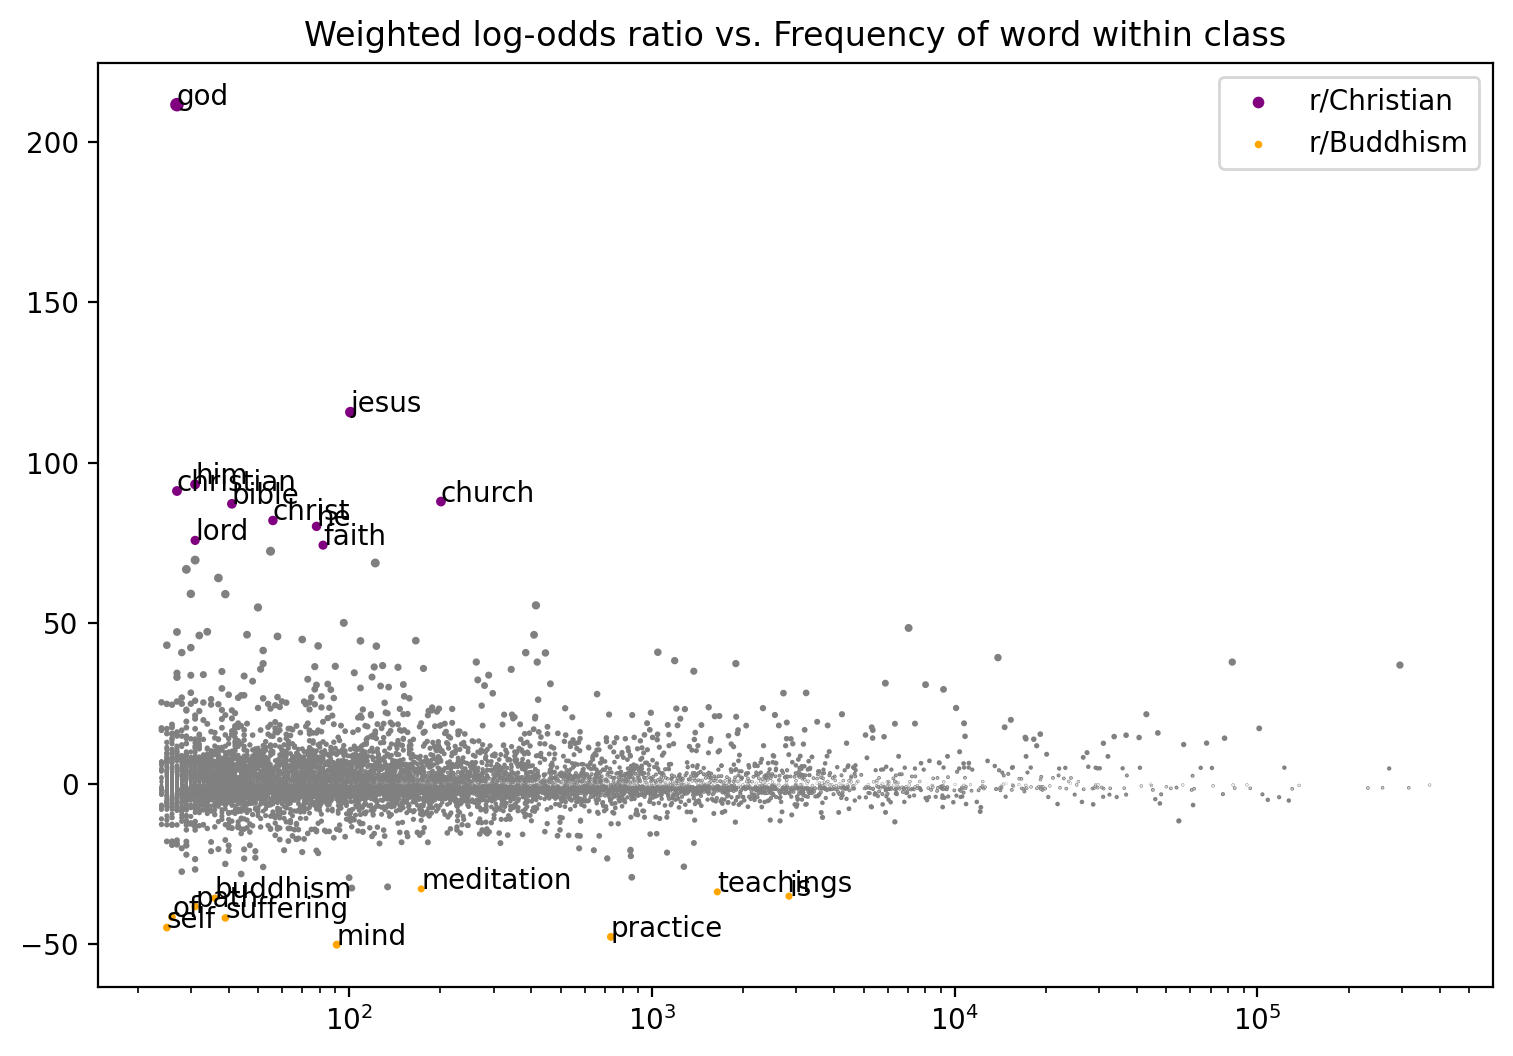

In [2]:
## This is too slow (especially when merding two corpuses)
# corpus_1 = Corpus.reconnect_to_db("subreddit-hinduism-small")
# corpus_2 = Corpus.reconnect_to_db("subreddit-judaism-small")

# locally is faster
christian = Corpus("subreddit-Christian-small", storage_type='mem')
print("Finished loading corpus_1")
buddhism = Corpus("subreddit-Buddhism-small", storage_type='mem')
print("Finished loading corpus_2")
corpus = Corpus.merge(christian, buddhism)
print("Finished merging")
fw = FightingWords(ngram_range=(1,1))
fw.fit(corpus, class1_func=lambda utt: utt.meta['permalink'].startswith('/r/Christian'), 
               class2_func=lambda utt: utt.meta['permalink'].startswith('/r/Buddhism'),)

df = fw.summarize(corpus, plot=True, class1_name='r/Christian', class2_name='r/Buddhism')

In [3]:
christian.print_summary_stats()

Number of Speakers: 3976
Number of Utterances: 33722
Number of Conversations: 3031


In [4]:
buddhism.print_summary_stats()

Number of Speakers: 15000
Number of Utterances: 201239
Number of Conversations: 14268


In [11]:
df.sort_values("z-score")

,z-score,class
ngram,,
mind,-50.120141,r/Buddhism
practice,-47.686897,r/Buddhism
self,-44.789946,r/Buddhism
suffering,-41.792785,r/Buddhism
of,-41.542490,r/Buddhism
...,...,...
church,87.882625,r/Christian
christian,91.173493,r/Christian
him,93.232589,r/Christian


In [12]:
', '.join(df[-50:].index[::-1])

'god, jesus, him, christian, church, bible, christ, he, lord, faith, sin, christians, pray, love, spirit, us, man, holy, his, marriage, saved, heaven, scripture, you, believe, father, sins, john, shall, prayer, her, son, salvation, she, word, praying, law, we, will, grace, bless, men, christianity, me, catholic, paul, loves, heart, gay, testament'

## Christian/Hinduism

Finished loading corpus_1
Finished loading corpus_2
Finished merging
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 32057 valid corpus components. class2_func returned 37607 valid corpus components.
Vocab size is 12386
Comparing language...
ngram zscores computed.


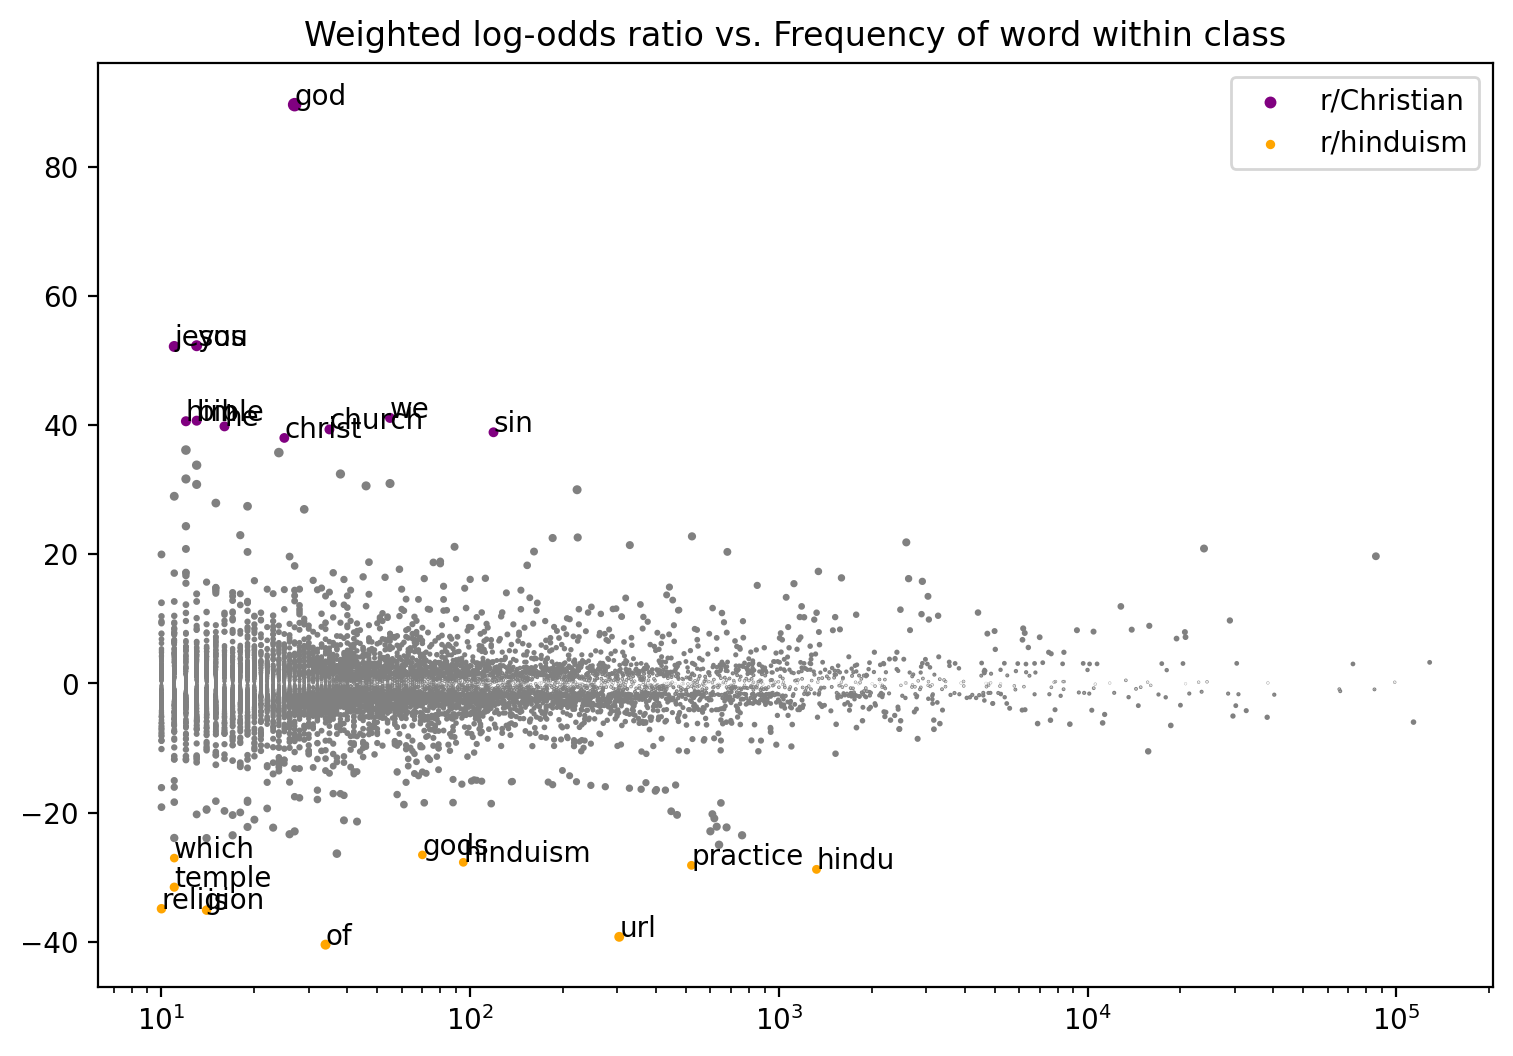

In [55]:
# locally is faster
corpus_1 = Corpus("subreddit-Christian-small", storage_type='mem')
print("Finished loading corpus_1")
corpus_2 = Corpus("subreddit-hinduism-small", storage_type='mem')
print("Finished loading corpus_2")
corpus = Corpus.merge(corpus_1, corpus_2)
print("Finished merging")
fw = FightingWords(ngram_range=(1,1))
fw.fit(corpus, class1_func=lambda utt: utt.meta['permalink'].startswith('/r/Christian'), 
               class2_func=lambda utt: utt.meta['permalink'].startswith('/r/hinduism'),)

df = fw.summarize(corpus, plot=True, class1_name='r/Christian', class2_name='r/hinduism')

In [57]:
df

,z-score,class
ngram,,
of,-40.440566,r/hinduism
url,-39.229427,r/hinduism
is,-35.092623,r/hinduism
religion,-34.876430,r/hinduism
temple,-31.537445,r/hinduism
...,...,...
bible,40.696749,r/Christian
we,41.128468,r/Christian
jesus,52.188838,r/Christian
